In [456]:
from typing import Tuple

import pandas as pd
import numpy as np
# check exchange rate correlation USD/PLN with average daily temperature

# create df with exchage rates data
rates = pd.read_csv('rates.csv')
rates

,Date,Close
0,2/1/2022 23:58:00,4.054550
1,2/2/2022 23:58:00,4.019206
2,2/3/2022 23:58:00,3.971248
3,2/4/2022 23:58:00,3.987400
4,2/5/2022 23:58:00,3.987400
...,...,...
386,2/22/2023 23:58:00,4.478300
387,2/23/2023 23:58:00,4.461155
388,2/24/2023 23:58:00,4.476217
389,2/25/2023 23:58:00,4.475717


In [457]:
rates.dtypes

Date      object
Close    float64
dtype: object

In [458]:
rates.describe()

,Close
count,391.000000
mean,4.481050
std,0.236057
min,3.935550
25%,4.328145
50%,4.457700
75%,4.662509
max,5.003250


In [459]:
# clean data 
# use rates and weather data in range(2/28/2022:2/26/2023)
import datetime
min_date = datetime.datetime(2022,2,28).date()
max_date = datetime.datetime(2023,2,20).date()

def clean_data_and_reindex_using_date(
    df: pd.DataFrame,
    min_date: datetime.date, 
    max_date: datetime.date, 
    date_label: str, 
    column_label: str,
    column_rename_to: str = ''
) -> pd.DataFrame:

    df['date'] = pd.to_datetime(df[date_label]).dt.date
    cleaned_df = df[df['date'].between(
        min_date, max_date, inclusive='both'
    )]

    return pd.DataFrame(
        list(cleaned_df[column_label]),
        index=cleaned_df.date, 
        columns=[column_rename_to and column_rename_to or column_label]

    )
# clean rates
final_rates = clean_data_and_reindex_using_date(
    rates, min_date, max_date, 'Date', 'Close', 'rate'
)

<Axes: xlabel='date'>

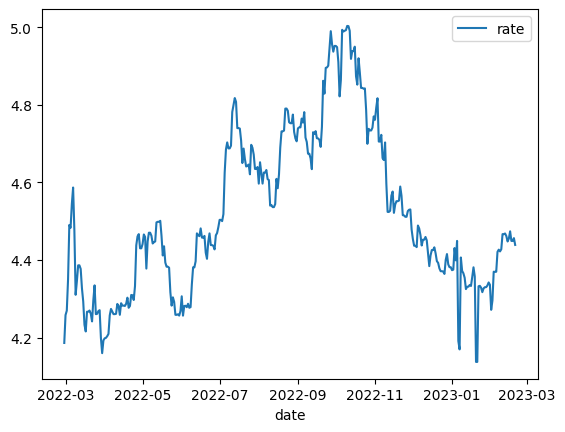

In [460]:
final_rates.plot()

In [467]:
# create df with weather data
weather = pd.read_csv('weather.csv')

# clean weather
final_weather = clean_data_and_reindex_using_date(
    weather, min_date, max_date, 'time', 'temperature'
).groupby('date').mean()


<Axes: xlabel='date'>

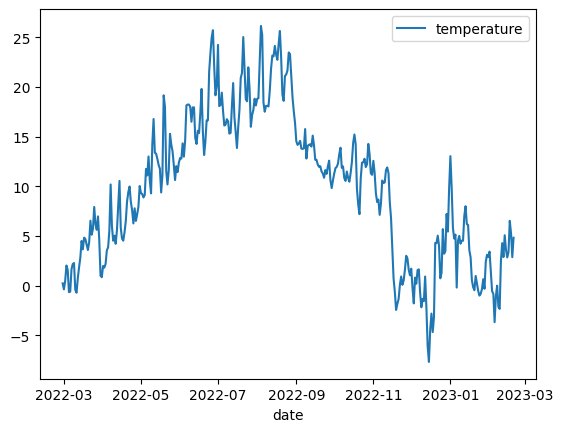

In [462]:
final_weather.plot()

In [469]:
unemplotment = pd.read_csv('unemployment.csv')
unemplotment

,date,unemployment_rate
0,2022-02,5.9
1,2022-03,5.8
2,2022-04,5.6
3,2022-05,5.4
4,2022-06,5.2
5,2022-07,5.2
6,2022-08,5.2
7,2022-09,5.1
8,2022-10,5.1
9,2022-11,5.1


In [ ]:
# fill up data

In [463]:
# join tables
merged = pd.merge(final_rates, final_weather, on='date')
merged.describe()

,rate,temperature
count,358.000000,358.000000
mean,4.516171,9.727549
std,0.207635,7.378599
min,4.137624,-7.687500
25%,4.356631,3.585417
50%,4.463945,10.539583
75%,4.689050,14.815625
max,5.003250,26.145833


In [464]:
# statistics
print('rate')
print(merged.rate.max())
print(merged.rate.mean())
print(merged.rate.min())
print('temperature')
print(merged.temperature.max())
print(merged.temperature.mean())
print(merged.temperature.min())

rate
5.00325
4.516171304469274
4.137624
temperature
26.145833333333332
9.727548882681564
-7.6875


In [ ]:
# analyze exchange rates

In [465]:
merged.corr(min_periods=3)
# looks like 45% correlation beetwen exchage rate and tempreature

,rate,temperature
rate,1.000000,0.447232
temperature,0.447232,1.000000


<Axes: xlabel='date'>

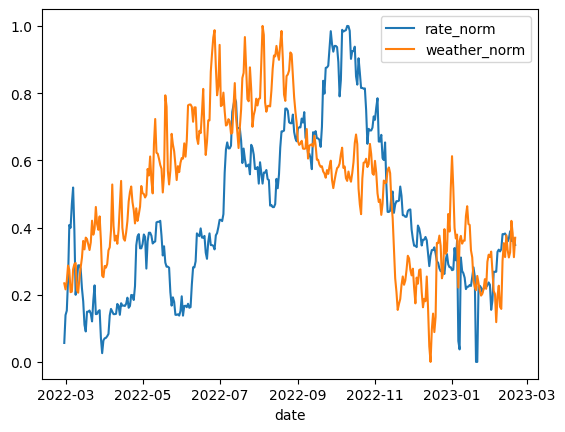

In [466]:
# normalization
def min_max_nornmalization(series: pd.Series)-> pd.Series:
    mm = series.agg(['min', 'max'])
    return (series - mm['min']) / (mm['max'] - mm['min'])

merged['rate_norm'] = min_max_nornmalization(merged.rate)
merged['weather_norm'] = min_max_nornmalization(merged.temperature)

merged.loc[:, ['rate_norm', 'weather_norm']].plot()